In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Reviews(13).csv')



## Correcting the spelling of one misspelled label
data['Label'] = data['Label'].str.replace('negative', 'Negative')
data['Label'] = data['Label'].str.replace('neutral', 'Neutral')
data['Label'] = data['Label'].str.replace('positive', 'Positive')
data['Label'] = data['Label'].str.replace('Netural', 'Neutral')
data['Label'] = data['Label'].str.replace(' Neutral', 'Neutral')

data['Label'].unique()

data['Label'].value_counts()


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['Label'], test_size=0.2, random_state=42)



In [28]:
# Preprocess the training and testing data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create a KNeighborsClassifier model
model = KNeighborsClassifier(n_neighbors=5)

In [29]:
# Fit the model on the training data
model.fit(X_train, y_train)


KNeighborsClassifier()

In [30]:
# Get the predicted labels for the testing data
y_pred = model.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
# Calculate the accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Classification report:\n{report}')


Accuracy: 0.8669940658890936
Classification report:
              precision    recall  f1-score   support

    Negative       0.85      0.86      0.85      1822
     Neutral       0.84      0.77      0.80       683
    Positive       0.89      0.90      0.89      2382

    accuracy                           0.87      4887
   macro avg       0.86      0.84      0.85      4887
weighted avg       0.87      0.87      0.87      4887



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

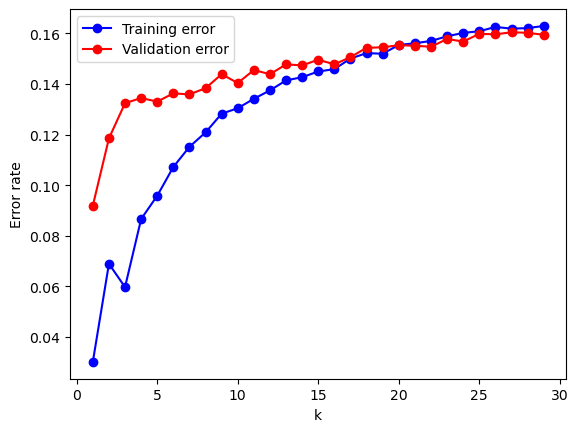

In [32]:
# Plot the accuracy and loss curves
train_errors, val_errors = [], []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_test)
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    val_errors.append(1 - accuracy_score(y_test, y_val_pred))

plt.plot(range(1, 30), train_errors, 'bo-', label='Training error')
plt.plot(range(1, 30), val_errors, 'ro-', label='Validation error')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.legend()
plt.show()


In [33]:
# Get predictions for sample reviews
reviews = [
    'The doctor was amazing! I highly recommend it.',
    'The service was terrible. I would never use this again.',
    'Average experience tha mera'
]
X_sample = vectorizer.transform(reviews)
y_sample_pred = model.predict(X_sample)
print(f'Reviews predicted sentiment: {y_sample_pred}')

Reviews predicted sentiment: ['Positive' 'Negative' 'Neutral']


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
